In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
ells_sample_file = "cache/_M/4000_1000_s/ells.npy"
M_file = "cache/_M/4000_1000_s/M.npy"

In [3]:
N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
fisher = Fisher(N0_file, N0_offset=2, ell_file=ells_sample_file, M_file=M_file)

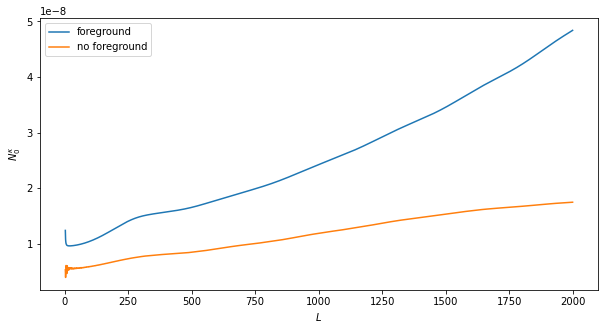

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:], label="foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")

N0_file = "cache/_N0/N0_my_S4_14_14_TQU.npy"
fisher.reset_noise(N0_file)

N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="no foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.legend()
plt.show()

In [5]:
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_S4_14_14_TQU.npy"
fisher.reset_noise(N0_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("No foreground")
print(f"S/N = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("No foreground + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("No foreground + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground
S/N = 3.24808520630139
No foreground + one N_k
S/N = 4.127050608410822
No foreground + no N_k
S/N = 4.775195102583595
---------------------------
Time = 1.2528960704803467


In [6]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("foreground")
print(f"S/N = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("foreground + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("foreground + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


foreground
S/N = 2.1410113307445573
foreground + one N_k
S/N = 2.8098919214145344
foreground + no N_k
S/N = 3.289630414221744
---------------------------
Time = 1.216897964477539


In [7]:
def get_Ls_sample(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

170.0
696.9818181818182
893.8000000000001
143.6
421.43636363636364
720.6
18.10741090774536


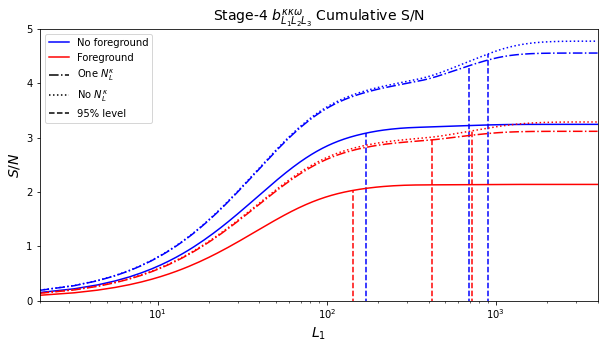

In [8]:
Nells = 500
level = 0.95
colors = ["blue", "red"]
N0_files = ["cache/_N0/N0_my_S4_14_14_TQU.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["No foreground", "Foreground"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [0,2]
N0_ell_factors = [True, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Stage-4 $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

In [9]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_S4_14_14_TQU.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["no foreground", "foreground"]
offsets = [0,2]
N0_ell_factors = [True, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky, auto=True, camb=True)
    print(f"S4 + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

S4 + no foreground
Auto ps S/N = 0.6797807317075135
Cross ps S/N = 35.40835649686979
---------------------------
S4 + foreground
Auto ps S/N = 0.37820389674283944
Cross ps S/N = 24.07004924563754
---------------------------
37.701306104660034


In [10]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_S4_14_14_TQU.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["no foreground", "foreground"]
offsets = [0,2]
N0_ell_factors = [True, False] 
t0 = time.time()
fisher.reset_M_spline("cache/_M/20000_1000/ells.npy", "cache/_M/20000_1000/M.npy")
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky, auto=True)
    print(f"S4 + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

S4 + no foreground
Auto ps S/N = 0.6827698568257573
Cross ps S/N = 35.37734492657769
---------------------------
S4 + foreground
Auto ps S/N = 0.38005829563625715
Cross ps S/N = 24.07012084834355
---------------------------
68.2040650844574
